# Exam 2012 Q1

## 1

In [291]:
import sympy as sp
sp.init_printing()

In [298]:
A = sp.Matrix([
    [2,2],
    [3,4]
])
A

⎡2  2⎤
⎢    ⎥
⎣3  4⎦

In [299]:
B = sp.Matrix([
    [1,2],
    [-1,2]
])
B

⎡1   2⎤
⎢     ⎥
⎣-1  2⎦

In [300]:
C = sp.Matrix([
    [4,-2],
    [1,0]
])
C

⎡4  -2⎤
⎢     ⎥
⎣1  0 ⎦

In [303]:
X = sp.MatrixSymbol("X",2,2)

sp.matrix_symbols(sp.Eq(A*X,B))

In [7]:
# AX = B
# X = A^-1B
X = A.inv()*B 
X

⎡ 3    2 ⎤
⎢        ⎥
⎣-5/2  -1⎦

In [18]:
# https://www.symbolab.com/solver/matrix-equations-calculator/%5Cbegin%7Bpmatrix%7D2%262%5C%5C%203%264%5Cend%7Bpmatrix%7Dx%3D%5Cbegin%7Bpmatrix%7D1%262%5C%5C%20-1%262%5Cend%7Bpmatrix%7D

In [24]:
# A^2X+B = 0
# X = -(A^2)^-1*B
X = -(A**2).inv()*B
X

⎡-17/2  -5⎤
⎢         ⎥
⎣  7    4 ⎦

In [25]:
# AXB = C
# X = A^-1*C*B^-1
X = A.inv()*C*B.inv()
X

⎡5/2   -9/2⎤
⎢          ⎥
⎣-7/4  13/4⎦

In [26]:
# AX + BX = C
# X = (A+B)^-1*C
X = (A+B).inv()*C
X

⎡ 2    -6/5⎤
⎢          ⎥
⎣-1/2  2/5 ⎦

In [27]:
# ACX = 0
# X = (AC)^-1*0
X = (A*C).inv()*0
X

⎡0  0⎤
⎢    ⎥
⎣0  0⎦

## 2

In [36]:
def z2_sanitize(X):
    return X.applyfunc(lambda x: x%2)
# Helper function

In [72]:
x1,x2,x3 = sp.symbols("x_1 x_2 x_3")

v1 = sp.Matrix([1,1,0,1])
v2 = sp.Matrix([1,0,1,1])
v3 = sp.Matrix([0,1,1,1])
b = sp.Matrix([1,0,1,1])

In [73]:
Vb = v1.row_join(v2).row_join(v3).row_join(b)
Vb

⎡1  1  0  1⎤
⎢          ⎥
⎢1  0  1  0⎥
⎢          ⎥
⎢0  1  1  1⎥
⎢          ⎥
⎣1  1  1  1⎦

In [74]:
Vb.row_swap(1,2)
Vb

⎡1  1  0  1⎤
⎢          ⎥
⎢0  1  1  1⎥
⎢          ⎥
⎢1  0  1  0⎥
⎢          ⎥
⎣1  1  1  1⎦

In [75]:
Vb.zip_row_op(2,0, lambda r3,r1: r3+r1)
Vb = z2_sanitize(Vb)
Vb

⎡1  1  0  1⎤
⎢          ⎥
⎢0  1  1  1⎥
⎢          ⎥
⎢0  1  1  1⎥
⎢          ⎥
⎣1  1  1  1⎦

In [76]:
Vb.zip_row_op(2,1, lambda r2,r1: r2+r1)
Vb = z2_sanitize(Vb)
Vb

⎡1  1  0  1⎤
⎢          ⎥
⎢0  1  1  1⎥
⎢          ⎥
⎢0  0  0  0⎥
⎢          ⎥
⎣1  1  1  1⎦

In [77]:
Vb.zip_row_op(3,0, lambda r4,r1: r4+r1)
Vb = z2_sanitize(Vb)
Vb

⎡1  1  0  1⎤
⎢          ⎥
⎢0  1  1  1⎥
⎢          ⎥
⎢0  0  0  0⎥
⎢          ⎥
⎣0  0  1  0⎦

In [78]:
Vb.row_swap(2,3)
Vb

⎡1  1  0  1⎤
⎢          ⎥
⎢0  1  1  1⎥
⎢          ⎥
⎢0  0  1  0⎥
⎢          ⎥
⎣0  0  0  0⎦

In [79]:
Vb.zip_row_op(1,2, lambda r2,r3: r3+r2)
Vb = z2_sanitize(Vb)
Vb

⎡1  1  0  1⎤
⎢          ⎥
⎢0  1  0  1⎥
⎢          ⎥
⎢0  0  1  0⎥
⎢          ⎥
⎣0  0  0  0⎦

In [80]:
Vb.zip_row_op(0,1, lambda r1,r2: r1+r2)
Vb = z2_sanitize(Vb)
Vb

⎡1  0  0  0⎤
⎢          ⎥
⎢0  1  0  1⎥
⎢          ⎥
⎢0  0  1  0⎥
⎢          ⎥
⎣0  0  0  0⎦

In [82]:
(Vb[0:3,3].T*sp.diag(x1,x2,x3)).T

⎡0 ⎤
⎢  ⎥
⎢x₂⎥
⎢  ⎥
⎣0 ⎦

In [83]:
# as dim Col A = n == there are no free variables and only one solution

## 3

In [84]:
l1,l2,l3 = 1.3,1,0.7

In [93]:
A,c1,c2,c3,v1,v2,v3,k = sp.symbols("A c_1 c_2 c_3 v_1 v_2 v_3 k")

x0 = c1*v1+c2*v2+c3*v3

AkX0 = A**k*x0
AkX0

In [94]:
AkX0.expand()

In [100]:
AkX0

In [101]:
lkX0 = l1**k*c1*v1+l2**k*c2*v2+l3**k*c3*v3
lkX0

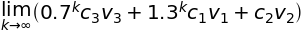

In [106]:
sp.Limit(lkX0, k, sp.oo)

In [108]:
sp.Limit(l1**k, k, sp.oo).doit()

In [109]:
sp.Limit(l2**k, k, sp.oo).doit()

In [110]:
sp.Limit(l3**k, k, sp.oo).doit()

## 4

In [137]:
t = sp.Matrix([0,2,5,6])
y = sp.Matrix([1,6,17,19])

In [138]:
# 1 Decide the modelparameteres for the two models
ts, b0,b2,y1,y2 = sp.symbols("t beta_0 beta_2 gamma_1 gamma_2")

y1t = b0+b2*ts**2
y1t

In [139]:
y2t = y1*ts+y2*ts**2
y2t

In [142]:
X1 = sp.ones(4,1).row_join(t.applyfunc(lambda x: x**2))
X1

⎡1  0 ⎤
⎢     ⎥
⎢1  4 ⎥
⎢     ⎥
⎢1  25⎥
⎢     ⎥
⎣1  36⎦

In [143]:
y

⎡1 ⎤
⎢  ⎥
⎢6 ⎥
⎢  ⎥
⎢17⎥
⎢  ⎥
⎣19⎦

In [146]:
B = (X1.T*X1).inv()*X1.T*y
B.evalf()

⎡ 2.7380073800738 ⎤
⎢                 ⎥
⎣0.493045699687766⎦

In [160]:
X2 = t.row_join(t.applyfunc(lambda x: x**2))
X2

⎡0  0 ⎤
⎢     ⎥
⎢2  4 ⎥
⎢     ⎥
⎢5  25⎥
⎢     ⎥
⎣6  36⎦

In [164]:
Y = (X2.T*X2).inv()*X2.T*y
Y.evalf()

⎡ 3.23830409356725  ⎤
⎢                   ⎥
⎣0.00146198830409357⎦

In [166]:
yhat1 = (X1*B).evalf()
yhat1

⎡2.7380073800738 ⎤
⎢                ⎥
⎢4.71019017882487⎥
⎢                ⎥
⎢15.064149872268 ⎥
⎢                ⎥
⎣20.4876525688334⎦

In [168]:
(y-yhat1).norm()

In [170]:
yhat2 = (X2*Y).evalf()
yhat2

⎡       0        ⎤
⎢                ⎥
⎢6.48245614035088⎥
⎢                ⎥
⎢16.2280701754386⎥
⎢                ⎥
⎣19.4824561403509⎦

In [171]:
(y-yhat2).norm()

In [173]:
# y2 model fits best as it has the smallest deviance from the data points
(y-yhat2).norm() < (y-yhat1).norm()

## 5

In [182]:
A = sp.Matrix([
    [1,2],
    [3,4]
])
A

⎡1  2⎤
⎢    ⎥
⎣3  4⎦

In [183]:
B = sp.Matrix([
    [2,3],
    [4,1]
])
B

⎡2  3⎤
⎢    ⎥
⎣4  1⎦

In [194]:
# 1. Calculate <A,B>
sp.trace(A*B.T) # <A,B> = a11b11 + ... + a22b22

In [197]:
# 2. Calculate the orthogonal basis

v1 = A
v1

⎡1  2⎤
⎢    ⎥
⎣3  4⎦

In [199]:
v2 = B - sp.trace(B*v1.T)/sp.trace(v1*v1.T)*v1
v2.evalf()

⎡1.2  1.4 ⎤
⎢         ⎥
⎣1.6  -2.2⎦

## 6

In [208]:
A = sp.Matrix([
    [3,-3,4],
    [6,-6,5],
    [9,-9,10]
])
A

⎡3  -3  4 ⎤
⎢         ⎥
⎢6  -6  5 ⎥
⎢         ⎥
⎣9  -9  10⎦

In [209]:
b = sp.Matrix([1,2,4])
b

⎡1⎤
⎢ ⎥
⎢2⎥
⎢ ⎥
⎣4⎦

In [210]:
# 1. Explain why Ax = b doesnt have a solution (is inconsistent)

Ab = A.row_join(b)
Ab

⎡3  -3  4   1⎤
⎢            ⎥
⎢6  -6  5   2⎥
⎢            ⎥
⎣9  -9  10  4⎦

In [211]:
Ab.rref()[0]

⎡1  -1  0  0⎤
⎢           ⎥
⎢0  0   1  0⎥
⎢           ⎥
⎣0  0   0  1⎦

In [212]:
# as 0 = 1 it is inconsistent

In [279]:
# 2. Calculate the least sqaure solution using pseudoinverse matrix

# Calculating SVD

import numpy as np

An = np.array(A.tolist(), dtype=float)
An 

array([[  3.,  -3.,   4.],
       [  6.,  -6.,   5.],
       [  9.,  -9.,  10.]])

In [280]:
U,S,V = np.linalg.svd(An, full_matrices=True)

In [281]:
U

array([[-0.29283974,  0.50631033, -0.81110711],
       [-0.494994  , -0.80605073, -0.32444284],
       [-0.81806224,  0.30648339,  0.48666426]])

In [282]:
S

array([  1.97800851e+01,   1.32220835e+00,   1.27592738e-15])

In [283]:
V = V.T
V

array([[ -5.66784386e-01,  -4.22794820e-01,  -7.07106781e-01],
       [  5.66784386e-01,   4.22794820e-01,  -7.07106781e-01],
       [ -5.97922168e-01,   8.01554166e-01,   8.88178420e-16]])

In [284]:
# as S only has two singular numbers different from zero. 
#(number three is a result in floating point precision)

Ur = sp.Matrix(U[:,0:2])
Ur

⎡-0.292839741153627  0.506310328908043 ⎤
⎢                                      ⎥
⎢-0.494994002505342  -0.806050730158472⎥
⎢                                      ⎥
⎣-0.818062236926274  0.306483394741092 ⎦

In [285]:
D = sp.diag(S[0], S[1])
D

⎡19.7800850623914         0        ⎤
⎢                                  ⎥
⎣       0          1.32220835141758⎦

In [286]:
Vr = sp.Matrix(V[:,0:2])
Vr

⎡-0.566784386187769  -0.422794819710169⎤
⎢                                      ⎥
⎢0.566784386187769    0.42279481971017 ⎥
⎢                                      ⎥
⎣-0.597922168135209  0.801554165888053 ⎦

In [287]:
Ap = Vr*D.inv()*Ur.T
Ap

⎡-0.153508771929824  0.271929824561403   -0.0745614035087718⎤
⎢                                                           ⎥
⎢0.153508771929825   -0.271929824561404  0.0745614035087721 ⎥
⎢                                                           ⎥
⎣ 0.31578947368421   -0.473684210526316   0.210526315789474 ⎦

In [288]:
xhat = Ap*b
xhat

⎡0.0921052631578949 ⎤
⎢                   ⎥
⎢-0.0921052631578948⎥
⎢                   ⎥
⎣ 0.210526315789474 ⎦

In [289]:
bhat = A*xhat
bhat

⎡1.39473684210526⎤
⎢                ⎥
⎢2.15789473684211⎥
⎢                ⎥
⎣3.76315789473685⎦